<a href="https://colab.research.google.com/github/Maouriyan/Traffic_Sign_Board_Detection/blob/master/Traffic_Sign_Board_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Traffic Sign Board Detection

Google Drive link for Dataset : https://drive.google.com/file/d/19EKSotNX8luEeFl1yNKAqLtCF8eAWZ4B/view?usp=sharing

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
import os
import cv2

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [4]:
from google.colab import auth
auth.authenticate_user()

from googleapiclient.discovery import build
drive_service = build('drive', 'v3')

# Replace the assignment below with your file ID
# to download a different file.
#
# A file ID looks like: 1gLBqEWEBQDYbKCDigHnUXNTkzl-OslSO

import io
from googleapiclient.http import MediaIoBaseDownload
file_id = "19EKSotNX8luEeFl1yNKAqLtCF8eAWZ4B"
request = drive_service.files().get_media(fileId=file_id)
downloaded = io.BytesIO()
downloader = MediaIoBaseDownload(downloaded, request)
done = False
while done is False:
  # _ is a placeholder for a progress object that we ignore.
  # (Our file is small, so we skip reporting progress.)
  _, done = downloader.next_chunk()

fileId = drive.CreateFile({'id':'19EKSotNX8luEeFl1yNKAqLtCF8eAWZ4B'})  #DRIVE_FILE_ID is file id example: 1iytA1n2z4go3uVCwE_vIKouTKyIDjEq
print(fileId['title'])  
fileId.GetContentFile(fileId['title'])  # Save Drive file as a local file

!unzip {fileId['title']}

gtsrb-german-traffic-sign.zip
Archive:  gtsrb-german-traffic-sign.zip
  inflating: Train.tar               
  inflating: Meta.tar                
  inflating: Meta.csv                
  inflating: Train.csv               
  inflating: Test.csv                
  inflating: Test.tar                


In [5]:
!mkdir /content/Train
!mkdir /content/Test
!apt-get install p7zip-full
!tar -xvf Train.tar -C /content/Train
!tar -xvf Test.tar -C /content/Test

Reading package lists... Done
Building dependency tree       
Reading state information... Done
p7zip-full is already the newest version (16.02+dfsg-6).
The following package was automatically installed and is no longer required:
  libnvidia-common-410
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 6 not upgraded.
./
./0/
./0/00000_00000_00000.png
./0/00000_00000_00001.png
./0/00000_00000_00002.png
./0/00000_00000_00003.png
./0/00000_00000_00004.png
./0/00000_00000_00005.png
./0/00000_00000_00006.png
./0/00000_00000_00007.png
./0/00000_00000_00008.png
./0/00000_00000_00009.png
./0/00000_00000_00010.png
./0/00000_00000_00011.png
./0/00000_00000_00012.png
./0/00000_00000_00013.png
./0/00000_00000_00014.png
./0/00000_00000_00015.png
./0/00000_00000_00016.png
./0/00000_00000_00017.png
./0/00000_00000_00018.png
./0/00000_00000_00019.png
./0/00000_00000_00020.png
./0/00000_00000_00021.png
./0/00000_00000_00022.png
./0/00000_00001_00004.png
./0/00000_00001_0

In [0]:
data_train=[]
labels_train=[]

for i in range(43) :
    path = "/content/Train/{0}/".format(i)
  
    Class=os.listdir(path)
    for a in Class:
        try:
            image=cv2.imread(path+a)
            image_from_array = Image.fromarray(image, 'RGB')
            # The images are of different size
            # this quick hack resizes them to the same size
            size_image = image_from_array.resize((30, 30))
            data_train.append(np.array(size_image))
            labels_train.append(i)
        except AttributeError:
            print(" ")

In [41]:
size_image

In [0]:
data=data_train
labels=labels_train

  

In [39]:
len(data)


39209

In [28]:
len(data[0])

30

In [19]:
len(labels)

39209

In [0]:
Cells=np.array(data)
labels=np.array(labels)

np.save("Cells",Cells)
np.save("labels",labels)

In [21]:
Cells.shape

(39209, 30, 30, 3)

In [0]:
Cells=np.load("Cells.npy")
labels=np.load("labels.npy")

In [0]:
s=np.arange(Cells.shape[0])
np.random.seed(43)
np.random.shuffle(s)
Cells=Cells[s]
labels=labels[s]

len_data=len(Cells)

In [0]:

# Another test/train split of the (original) train data. 
# The Test.tar-date is not used yet, but should be used
#   as the evaluation data at the end of the analysis
(X_train,X_test)=Cells[(int)(0.2*len_data):],Cells[:(int)(0.2*len_data)]
X_train = X_train.astype('float32')/255 
X_test = X_test.astype('float32')/255
train_len=len(X_train)
test_len=len(X_test)
(y_train,y_test)=labels[(int)(0.2*len_data):],labels[:(int)(0.2*len_data)]

In [0]:
X_train = X_train.reshape(-1, 30*30*3)
X_test = X_test.reshape(-1,30*30*3)

# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals
from io import open

# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

In [34]:
height = 30
width = 30
channels = 3
n_inputs = height * width*channels

conv1_fmaps = 4 
conv1_ksize = 3
conv1_stride = 1
conv1_pad = "SAME"

conv2_fmaps = 8
conv2_ksize = 3
conv2_stride = 2
conv2_pad = "SAME"

pool3_fmaps = conv2_fmaps

n_fc1 = 32 # 64
n_outputs = 43

reset_graph()

with tf.name_scope("inputs"):
    X = tf.placeholder(tf.float32, shape=[None, n_inputs], name="X")
    X_reshaped = tf.reshape(X, shape=[-1, height, width, channels])
    y = tf.placeholder(tf.int32, shape=[None], name="y")

conv1 = tf.layers.conv2d(X_reshaped, filters=conv1_fmaps, kernel_size=conv1_ksize,
                         strides=conv1_stride, padding=conv1_pad,
                         activation=tf.nn.relu, name="conv1")
conv2 = tf.layers.conv2d(conv1, filters=conv2_fmaps, kernel_size=conv2_ksize,
                         strides=conv2_stride, padding=conv2_pad,
                         activation=tf.nn.relu, name="conv2")

with tf.name_scope("pool3"):
    pool3 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding="VALID")
    pool3_flat = tf.reshape(pool3, shape=[-1, pool3_fmaps * 7 * 7])

with tf.name_scope("fc1"):
    fc1 = tf.layers.dense(pool3_flat, n_fc1, activation=tf.nn.relu, name="fc1")

with tf.name_scope("output"):
    logits = tf.layers.dense(fc1, n_outputs, name="output")
    Y_proba = tf.nn.softmax(logits, name="Y_proba")

with tf.name_scope("train"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=y)
    loss = tf.reduce_mean(xentropy)
    optimizer = tf.train.AdamOptimizer()
    training_op = optimizer.minimize(loss)

with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

with tf.name_scope("init_and_save"):
    init = tf.global_variables_initializer()
    saver = tf.train.Saver()

Instructions for updating:
Use keras.layers.conv2d instead.
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use keras.layers.dense instead.


In [0]:
def shuffle_batch(X, y, batch_size):
    rnd_idx = np.random.permutation(len(X))
    n_batches = len(X) // batch_size
    for batch_idx in np.array_split(rnd_idx, n_batches):
        X_batch, y_batch = X[batch_idx], y[batch_idx]
        yield X_batch, y_batch

In [36]:
n_epochs = 10
batch_size = 100

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_batch = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_test = accuracy.eval(feed_dict={X: X_test, y: y_test})
        print(epoch, "Last batch accuracy:", acc_batch, "Test accuracy:", acc_test)
        
    final_prediction = Y_proba.eval(feed_dict={X: X_test})

0 Last batch accuracy: 0.45 Test accuracy: 0.4792756
1 Last batch accuracy: 0.74 Test accuracy: 0.70399183
2 Last batch accuracy: 0.69 Test accuracy: 0.7638056
3 Last batch accuracy: 0.89 Test accuracy: 0.82425714
4 Last batch accuracy: 0.89 Test accuracy: 0.8445351
5 Last batch accuracy: 0.91 Test accuracy: 0.8680015
6 Last batch accuracy: 0.91 Test accuracy: 0.8850912
7 Last batch accuracy: 0.95 Test accuracy: 0.88649404
8 Last batch accuracy: 0.92 Test accuracy: 0.8942737
9 Last batch accuracy: 0.94 Test accuracy: 0.9049866


In [0]:
# The confusion matrix plotting function is from the sklearn documentation below:
# http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=75) 
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
class_names = range(43)

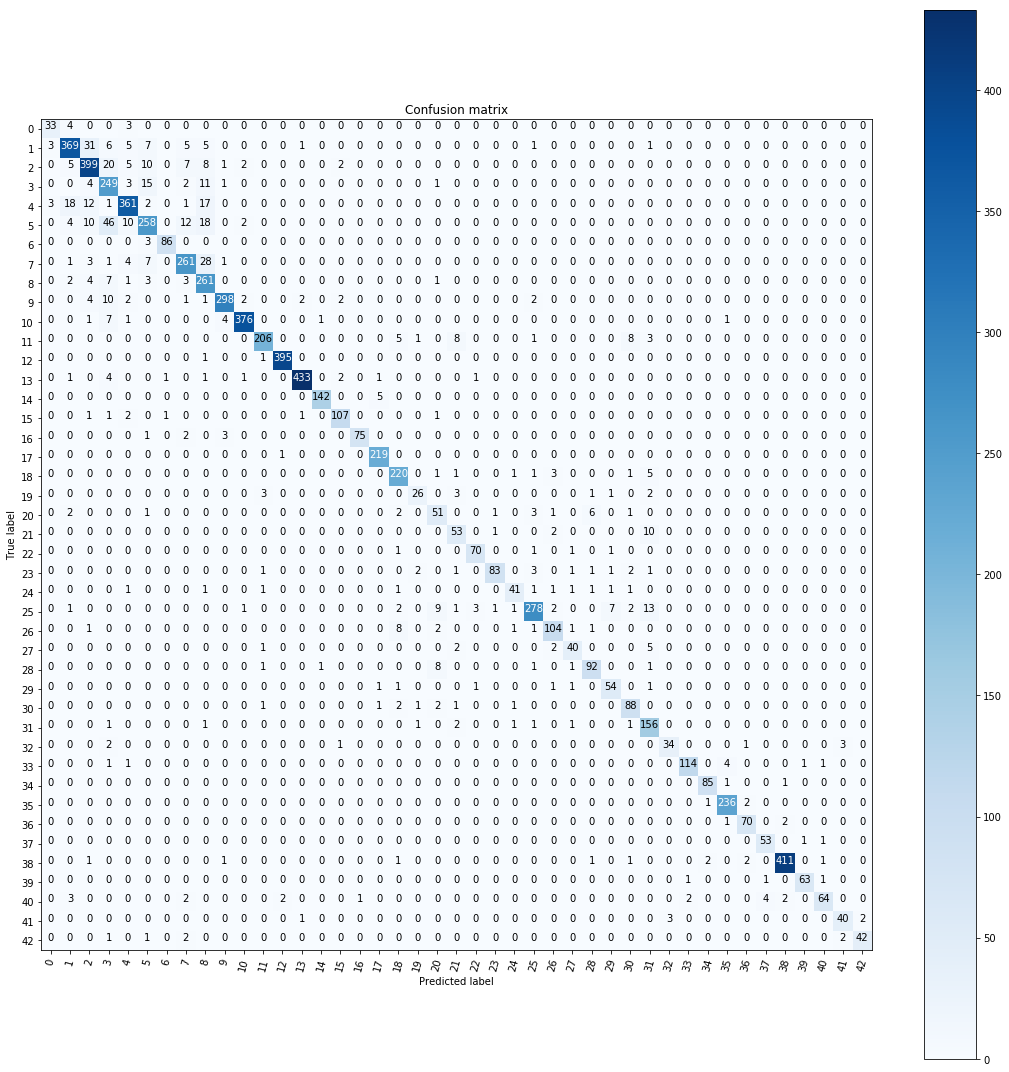

In [38]:
# evaluate the output in a confusion matrix. 
plt.figure(figsize=(15,15))
cm = confusion_matrix(y_test,np.argmax(final_prediction, axis=1))
plot_confusion_matrix(cm, classes=class_names, title='Confusion matrix')